In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(8.0, 5.5))
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [3]:
from sklearn import preprocessing
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection

In [4]:
df = sm.datasets.fair.load_pandas().data
df = df.assign(affairs_yn=(df.affairs > 0).astype(float))
df = df.drop(columns='affairs')
display(df.sample(5, random_state=20190812))
df_1 = df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs_yn
6150,5.0,17.5,0.5,0.0,3.0,12.0,6.0,2.0,0.0
146,3.0,22.0,2.5,0.0,1.0,12.0,2.0,4.0,1.0
3923,5.0,27.0,0.5,0.0,2.0,16.0,4.0,4.0,0.0
5116,5.0,32.0,13.0,0.0,1.0,14.0,4.0,4.0,0.0
597,5.0,27.0,6.0,0.0,2.0,16.0,3.0,5.0,1.0


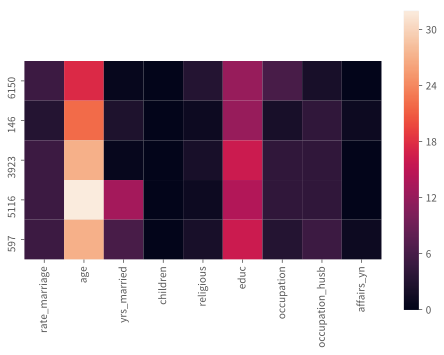

In [5]:
df = df_1
sns.heatmap(
    df.sample(5, random_state=20190812),
    square=True,
    # annot=True, fmt='.2f'
)

rate_marriage      4949.000000
age                3009.653061
yrs_married        2407.600000
children           1616.818182
religious          3026.333333
educ               3015.090909
occupation         3086.400000
occupation_husb    3628.800000
affairs_yn         2053.000000
dtype: float64

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs_yn
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,0.777411,0.472770,0.378197,0.253977,0.475390,0.473624,0.484826,0.570028,0.322495
std,0.240357,0.279505,0.323561,0.260631,0.292790,0.198000,0.188480,0.269287,0.467468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.183673,0.088889,0.000000,0.333333,0.272727,0.400000,0.400000,0.000000
50%,0.750000,0.387755,0.244444,0.181818,0.333333,0.454545,0.400000,0.600000,0.000000
75%,1.000000,0.591837,0.711111,0.363636,0.666667,0.636364,0.600000,0.800000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


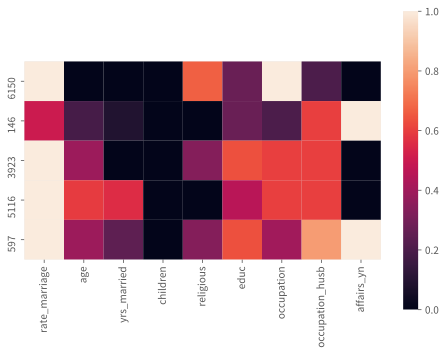

In [6]:
df = df_1

# a = preprocessing.normalize(df, axis=0, norm='l1')
a = preprocessing.minmax_scale(df, axis=0)
df = pd.DataFrame(a, columns=df.columns)

display(df.sum(axis=0))
display(df.describe())

sns.heatmap(
    df.sample(5, random_state=20190812),
    vmin=0, vmax=1, square=True,
    # annot=True, fmt='.2f'
)